In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

#algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dataframe_original = pd.read_csv("resources/diabetes_dataset00.csv")

df = dataframe_original.copy()

df = df.sample(n=10000, random_state=99)        #pickup random 10000 raws
df = df.reset_index(drop=True)      #then reset the index back if again random forest is used 

df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,29,36,32,Low,Healthy,...,78,No,Yes,Positive,3,Abnormal,53,Ketones Present,2645,Yes
1,Secondary Diabetes,Positive,Negative,Yes,Present,48,64,22,High,Unhealthy,...,75,No,Yes,Negative,2,Normal,57,Glucose Present,4302,Yes
2,MODY,Positive,Negative,Yes,Absent,22,21,28,High,Unhealthy,...,87,Yes,Yes,Negative,2,Normal,45,Normal,3892,No
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,8,14,21,Moderate,Healthy,...,88,Yes,No,Negative,2,Abnormal,49,Protein Present,2773,Yes
4,Wolfram Syndrome,Positive,Negative,No,Absent,17,14,17,Moderate,Healthy,...,52,Yes,No,Negative,1,Abnormal,24,Normal,2121,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,31,23,29,Moderate,Unhealthy,...,64,No,No,Negative,2,Normal,72,Glucose Present,2572,Yes
9996,Wolfram Syndrome,Positive,Negative,No,Absent,11,8,22,Low,Healthy,...,52,Yes,Yes,Negative,2,Abnormal,25,Normal,1961,No
9997,MODY,Negative,Positive,Yes,Present,11,29,24,Moderate,Healthy,...,78,No,No,Negative,2,Abnormal,46,Protein Present,2670,No
9998,Type 2 Diabetes,Positive,Positive,No,Absent,45,57,31,Moderate,Healthy,...,66,No,Yes,Positive,3,Normal,44,Protein Present,3121,No


In [96]:
df.info()       #gives you info about the dataset that you have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         10000 non-null  object
 1   Genetic Markers                10000 non-null  object
 2   Autoantibodies                 10000 non-null  object
 3   Family History                 10000 non-null  object
 4   Environmental Factors          10000 non-null  object
 5   Insulin Levels                 10000 non-null  int64 
 6   Age                            10000 non-null  int64 
 7   BMI                            10000 non-null  int64 
 8   Physical Activity              10000 non-null  object
 9   Dietary Habits                 10000 non-null  object
 10  Blood Pressure                 10000 non-null  int64 
 11  Cholesterol Levels             10000 non-null  int64 
 12  Waist Circumference            10000 non-null  int64 
 13  Bl

In [77]:
df['Target'].unique()

array(['Steroid-Induced Diabetes', 'Secondary Diabetes', 'MODY',
       'Type 1 Diabetes', 'Wolfram Syndrome',
       'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Neonatal Diabetes Mellitus (NDM)', 'Gestational Diabetes',
       'Wolcott-Rallison Syndrome',
       'Cystic Fibrosis-Related Diabetes (CFRD)', 'Type 2 Diabetes',
       'Prediabetic', 'LADA'], dtype=object)

Thus we have found from the above that we have mainly 13 types of diabetes from the dataset 

In [78]:
df.duplicated().sum()

np.int64(0)

we dont have any duplicated row in our dataset which means that every entry in the given table is unique

In [79]:
df.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

we dont have any missing value in out dataset 

In [80]:
df['Target'].value_counts()

Target
Secondary Diabetes                            834
LADA                                          826
Wolcott-Rallison Syndrome                     793
MODY                                          787
Type 1 Diabetes                               771
Type 3c Diabetes (Pancreatogenic Diabetes)    770
Cystic Fibrosis-Related Diabetes (CFRD)       760
Type 2 Diabetes                               760
Prediabetic                                   758
Neonatal Diabetes Mellitus (NDM)              740
Wolfram Syndrome                              737
Steroid-Induced Diabetes                      732
Gestational Diabetes                          732
Name: count, dtype: int64

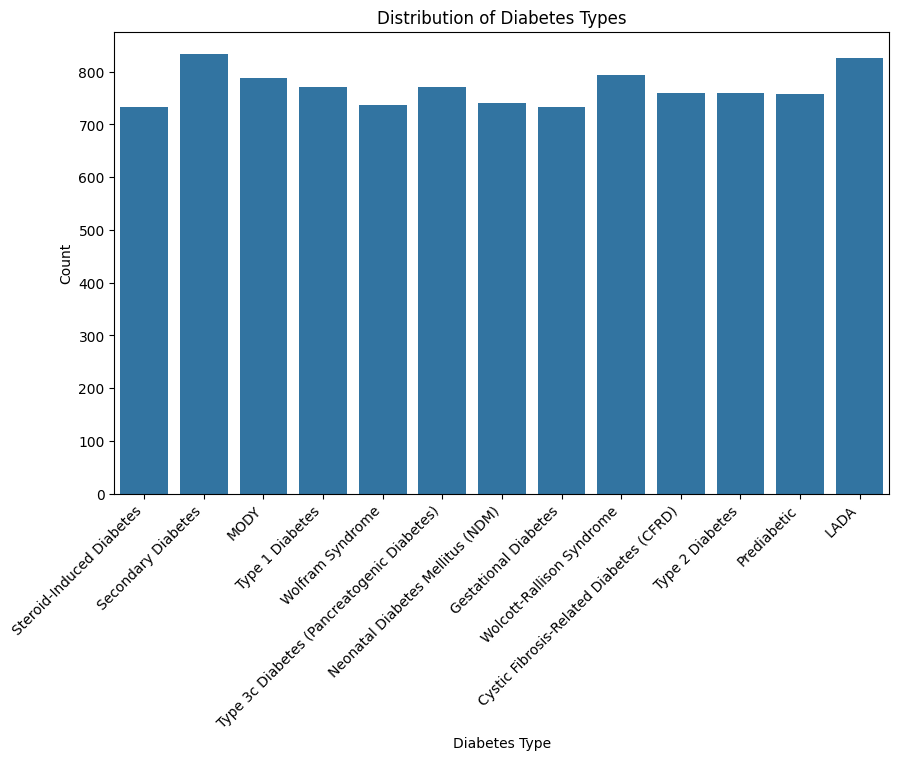

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Target')
plt.title('Distribution of Diabetes Types')
plt.xlabel('Diabetes Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

here as we can see that for all the types of diabetes we can find the number of patients who has been positively tested count of them

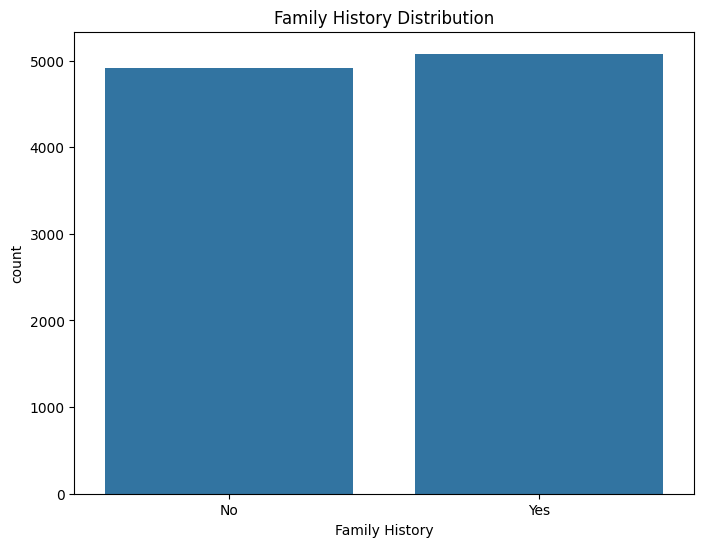

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family History', data=df)
plt.title('Family History Distribution')
plt.show()

the difference between the patients having the history of diabetes is not that different as most have the history but the count that doesnt is also not that quite low so ....

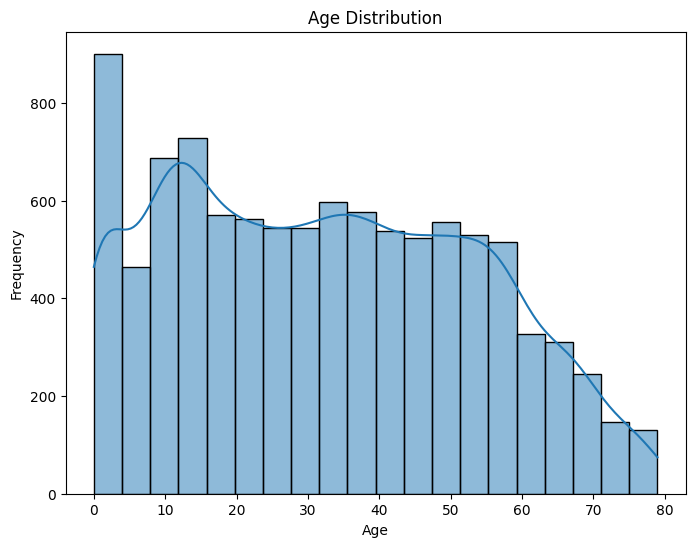

In [83]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

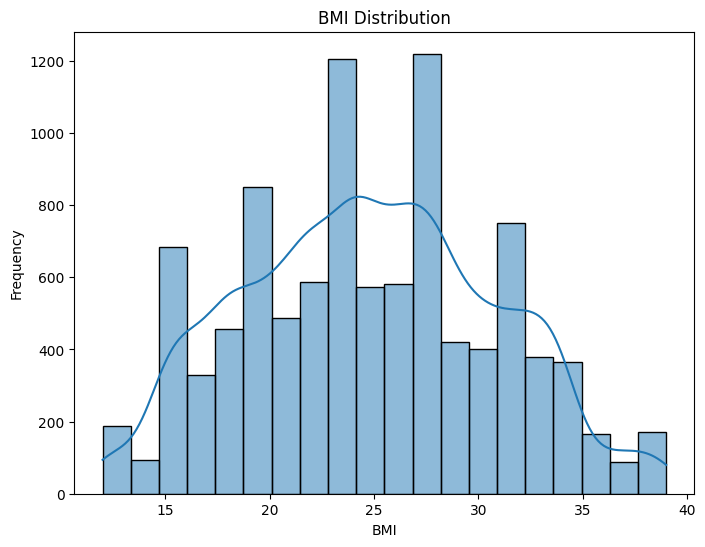

In [84]:
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


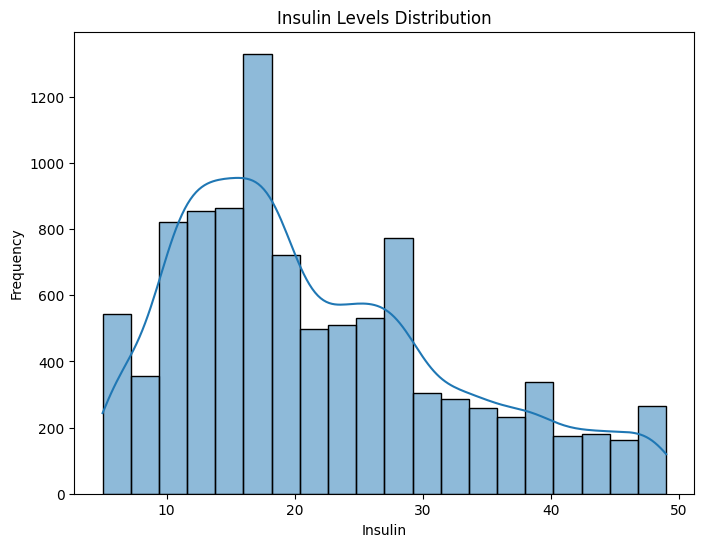

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(df['Insulin Levels'], bins=20, kde=True)
plt.title('Insulin Levels Distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

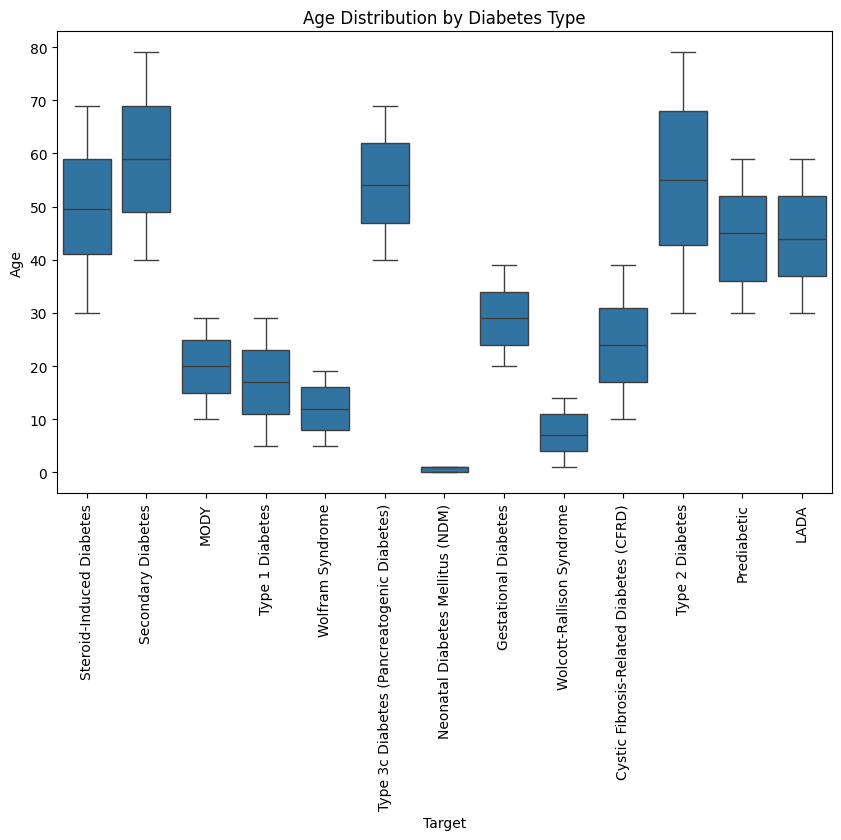

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Age Distribution by Diabetes Type')
plt.show()

here from the above plot we can get insights into:
1. for NDM we dont have any person in our dataset that has this type of diabetes
2. the maximum age range is found to be of Type-2 Diabetes
3. we can get insight about what range of people are immune to what type of diabetes and we can use that to our advantage

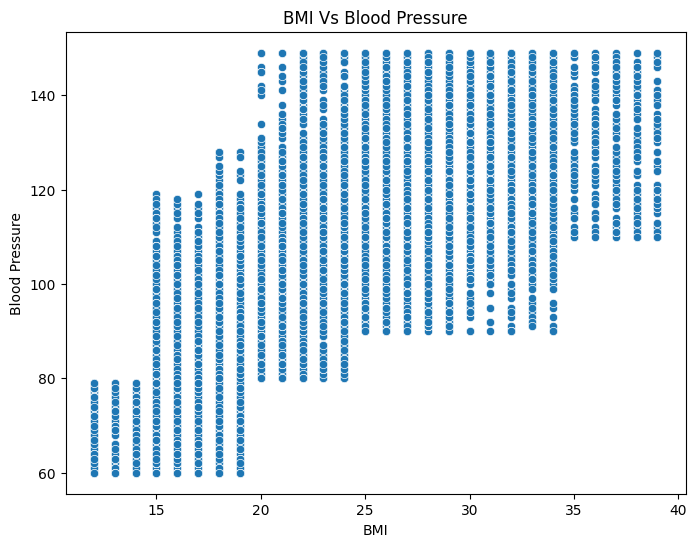

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Blood Pressure', data=df)
plt.title('BMI Vs Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

we have an important insight from this plot as the BMI of the patient is increasing we can see that his Blood Pressure also increases approximately linearly

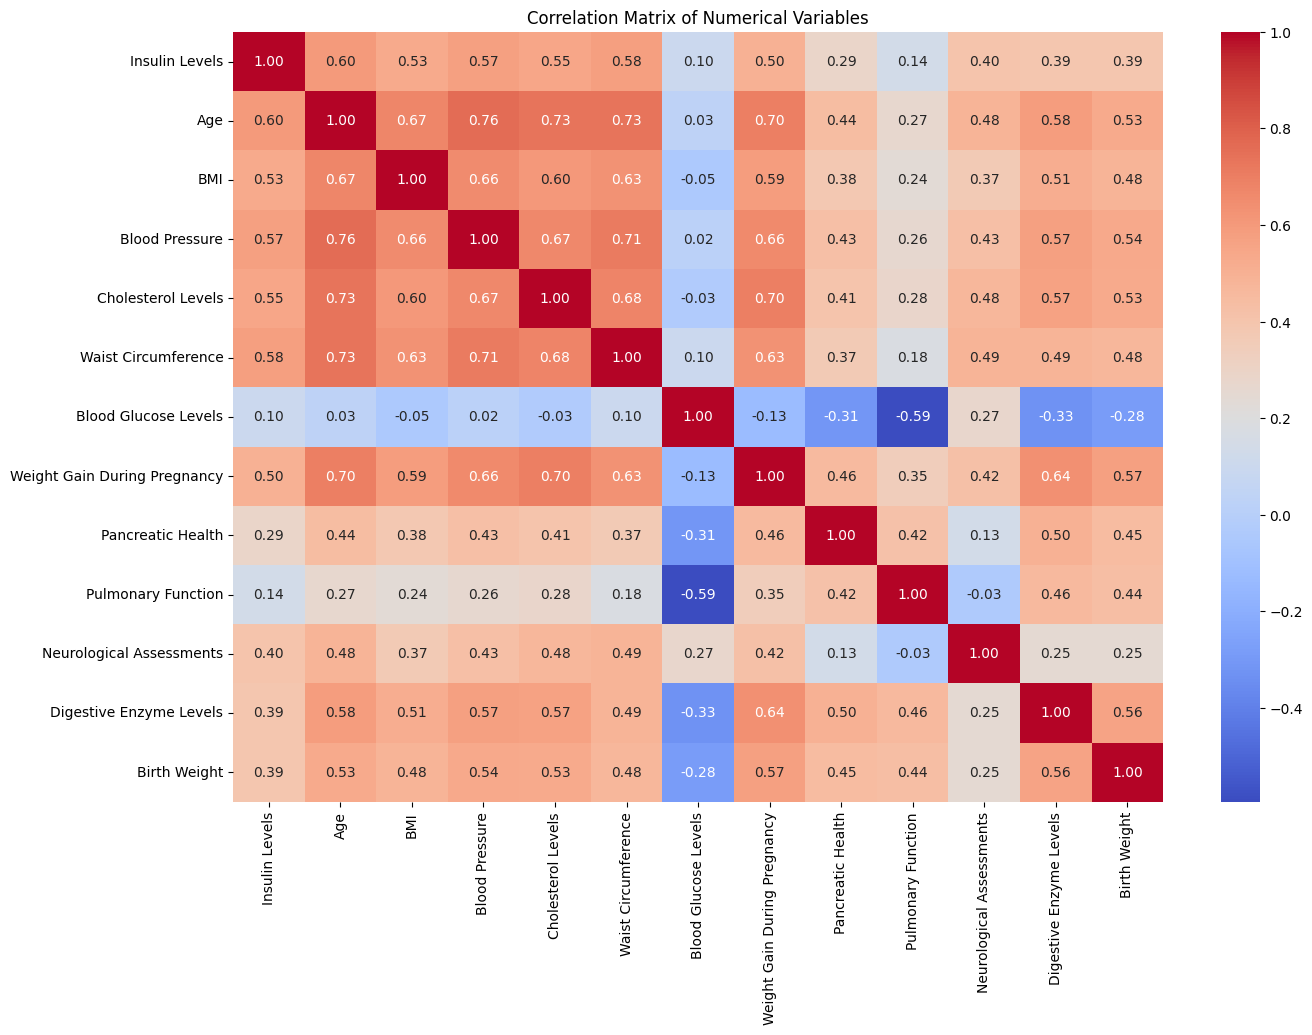

In [88]:
df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

from the above correlation matrix as we can see :
1. strong positive correlation : when we have >0.5 like (ex. 0.63 or 0.71) we have a strong correlation which means that on increasing one of the component in the above matrix the another will also increases with one.
2. strong negative correlation: on increasing with one component the other one decreases 
3. weak correlation : all those values which doesnt come under any of the above two lies in this criteria where we dont have a good correlation but will increase slightly with the other component that we are checking upon 

In [89]:
pd.set_option('display.max_colwidth', None)

kolom_cat_cek = list(df.select_dtypes(include='object').columns)

listItem = []

for col in kolom_cat_cek:
    listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['name of column', 'number of unique values', 'unique value'], data = listItem)

,name of column,number of unique values,unique value
0,Target,13,"[Steroid-Induced Diabetes, Secondary Diabetes, MODY, Type 1 Diabetes, Wolfram Syndrome, Type 3c Diabetes (Pancreatogenic Diabetes), Neonatal Diabetes Mellitus (NDM), Gestational Diabetes, Wolcott-Rallison Syndrome, Cystic Fibrosis-Related Diabetes (CFRD), Type 2 Diabetes, Prediabetic, LADA]"
1,Genetic Markers,2,"[Positive, Negative]"
2,Autoantibodies,2,"[Negative, Positive]"
3,Family History,2,"[No, Yes]"
4,Environmental Factors,2,"[Present, Absent]"
5,Physical Activity,3,"[Low, High, Moderate]"
6,Dietary Habits,2,"[Healthy, Unhealthy]"
7,Ethnicity,2,"[High Risk, Low Risk]"
8,Socioeconomic Factors,3,"[High, Medium, Low]"
9,Smoking Status,2,"[Smoker, Non-Smoker]"


In [97]:
df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,29,36,32,Low,Healthy,...,78,No,Yes,Positive,3,Abnormal,53,Ketones Present,2645,Yes
1,Secondary Diabetes,Positive,Negative,Yes,Present,48,64,22,High,Unhealthy,...,75,No,Yes,Negative,2,Normal,57,Glucose Present,4302,Yes
2,MODY,Positive,Negative,Yes,Absent,22,21,28,High,Unhealthy,...,87,Yes,Yes,Negative,2,Normal,45,Normal,3892,No
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,8,14,21,Moderate,Healthy,...,88,Yes,No,Negative,2,Abnormal,49,Protein Present,2773,Yes
4,Wolfram Syndrome,Positive,Negative,No,Absent,17,14,17,Moderate,Healthy,...,52,Yes,No,Negative,1,Abnormal,24,Normal,2121,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,31,23,29,Moderate,Unhealthy,...,64,No,No,Negative,2,Normal,72,Glucose Present,2572,Yes
9996,Wolfram Syndrome,Positive,Negative,No,Absent,11,8,22,Low,Healthy,...,52,Yes,Yes,Negative,2,Abnormal,25,Normal,1961,No
9997,MODY,Negative,Positive,Yes,Present,11,29,24,Moderate,Healthy,...,78,No,No,Negative,2,Abnormal,46,Protein Present,2670,No
9998,Type 2 Diabetes,Positive,Positive,No,Absent,45,57,31,Moderate,Healthy,...,66,No,Yes,Positive,3,Normal,44,Protein Present,3121,No


In [98]:
df = df[
    ['Target', 'Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Smoking Status', 'Glucose Tolerance Test', 'History of PCOS', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms', 'Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels']
]

df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,Positive,Abnormal,Ketones Present,Yes,29,36,32,115,221,134
1,Secondary Diabetes,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,Negative,Normal,Glucose Present,Yes,48,64,22,125,224,205
2,MODY,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,Negative,Normal,Normal,No,22,21,28,95,182,122
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,Negative,Abnormal,Protein Present,Yes,8,14,21,93,153,121
4,Wolfram Syndrome,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,Negative,Abnormal,Normal,No,17,14,17,92,173,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,Negative,Normal,Glucose Present,Yes,31,23,29,96,163,131
9996,Wolfram Syndrome,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,Negative,Abnormal,Normal,No,11,8,22,104,164,288
9997,MODY,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,Negative,Abnormal,Protein Present,No,11,29,24,113,182,138
9998,Type 2 Diabetes,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,Positive,Normal,Protein Present,No,45,57,31,130,269,169


function to catagorize the target that we have now 

In [99]:
def target_category(target):
    if target in ['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)']:
        return 1
    elif target in ['Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA']:
        return 2
    elif target in ['Type 2 Diabetes']:
        return 3
    elif target in ['Wolcott-Rallison Syndrome', 'Secondary Diabetes']:
        return 4
    else:
        return 5
    
df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,Positive,Abnormal,Ketones Present,Yes,29,36,32,115,221,134
1,Secondary Diabetes,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,Negative,Normal,Glucose Present,Yes,48,64,22,125,224,205
2,MODY,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,Negative,Normal,Normal,No,22,21,28,95,182,122
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,Negative,Abnormal,Protein Present,Yes,8,14,21,93,153,121
4,Wolfram Syndrome,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,Negative,Abnormal,Normal,No,17,14,17,92,173,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,Negative,Normal,Glucose Present,Yes,31,23,29,96,163,131
9996,Wolfram Syndrome,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,Negative,Abnormal,Normal,No,11,8,22,104,164,288
9997,MODY,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,Negative,Abnormal,Protein Present,No,11,29,24,113,182,138
9998,Type 2 Diabetes,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,Positive,Normal,Protein Present,No,45,57,31,130,269,169


here in the above code we are reducing the catagories of diabetes from 13 to 5 catagories in our case 
catagory 1 - from infant to 6 months of age
catagory 2 - Type 1 diabetes
catagory 3 - Type 2 diabetes where the body cannot use the insulin of the body
catagory 4 - 

In [102]:
df['Category Target'] = df['Target'].apply(target_category)

df.drop('Target', axis=1)

df

C:\Users\jangi\AppData\Local\Temp\ipykernel_10860\1114130659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category Target'] = df['Target'].apply(target_category)


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,...,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Category Target
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,...,Abnormal,Ketones Present,Yes,29,36,32,115,221,134,1
1,Secondary Diabetes,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,...,Normal,Glucose Present,Yes,48,64,22,125,224,205,4
2,MODY,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,...,Normal,Normal,No,22,21,28,95,182,122,5
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,...,Abnormal,Protein Present,Yes,8,14,21,93,153,121,2
4,Wolfram Syndrome,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,...,Abnormal,Normal,No,17,14,17,92,173,233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,...,Normal,Glucose Present,Yes,31,23,29,96,163,131,5
9996,Wolfram Syndrome,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,...,Abnormal,Normal,No,11,8,22,104,164,288,2
9997,MODY,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,...,Abnormal,Protein Present,No,11,29,24,113,182,138,5
9998,Type 2 Diabetes,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,...,Normal,Protein Present,No,45,57,31,130,269,169,3


In [107]:
df.drop('Target', axis=1)

,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Category Target
0,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,Positive,Abnormal,Ketones Present,Yes,29,36,32,115,221,134,1
1,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,Negative,Normal,Glucose Present,Yes,48,64,22,125,224,205,4
2,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,Negative,Normal,Normal,No,22,21,28,95,182,122,5
3,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,Negative,Abnormal,Protein Present,Yes,8,14,21,93,153,121,2
4,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,Negative,Abnormal,Normal,No,17,14,17,92,173,233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,Negative,Normal,Glucose Present,Yes,31,23,29,96,163,131,5
9996,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,Negative,Abnormal,Normal,No,11,8,22,104,164,288,2
9997,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,Negative,Abnormal,Protein Present,No,11,29,24,113,182,138,5
9998,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,Positive,Normal,Protein Present,No,45,57,31,130,269,169,3


In [108]:
df['Category Target'].value_counts()

Category Target
2    3092
5    3049
4    1627
1    1472
3     760
Name: count, dtype: int64